# Cancellation US Flights Reasons - 2008
## by Lama AlOud

## Investigation Overview

> The US Filghts Data Exploration shows the Cancellation Reasons in Months/Days of 2008 year, distance miles, Unique Carrier and IATA airport code.

## Dataset Overview

> The dataset include flights info of the United States, about carriers, arrival, departure delays and cancelled trips, and reasons for delays or cancellations, for 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df_flight_2008 = pd.read_csv('../Dataset/2008.csv')
# let first have df with only cancelation flights
df_flight_2008_cancellation = df_flight_2008[df_flight_2008.Cancelled == 1]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Cancellation Flights Reasons

> The reason of flights cancellation in the dataset are 'carrier', 'weather', 'NAS' and 'security' sequentially, where carrier have 54904 then weather have 54330, NAS (National Airspace System) have 28188 and security 12 flights cancellations.

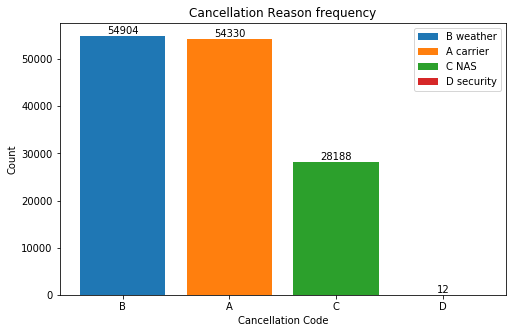

In [6]:
# Cancellation Code
# CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
CancellationCode_series = df_flight_2008.CancellationCode[df_flight_2008.Cancelled == 1]
dict_CancellationCode_series = dict(CancellationCode_series.value_counts())

CancellationCode = {'A':'carrier', 'B':'weather', 'C':'NAS', 'D':'security'}

plt.figure(figsize=[8, 5])
for key in dict_CancellationCode_series.keys():
    key_value = dict_CancellationCode_series.get(key)
    plt.bar(key, key_value, label=key+' '+CancellationCode.get(key))
    plt.text(key, key_value, str(key_value), ha='center', va='bottom')
plt.legend()
plt.title('Cancellation Reason frequency')
plt.xlabel('Cancellation Code')
plt.ylabel('Count');

## Trips Distance in miles and  Cancellation Flights Reasons

> From the Mean of Distance -in mile- and CancellationCode features:
          - mean of distance for carrier is 634.40, weather is 584.56, NAS is 471.27 and security(highest mean distance) is 719.58.

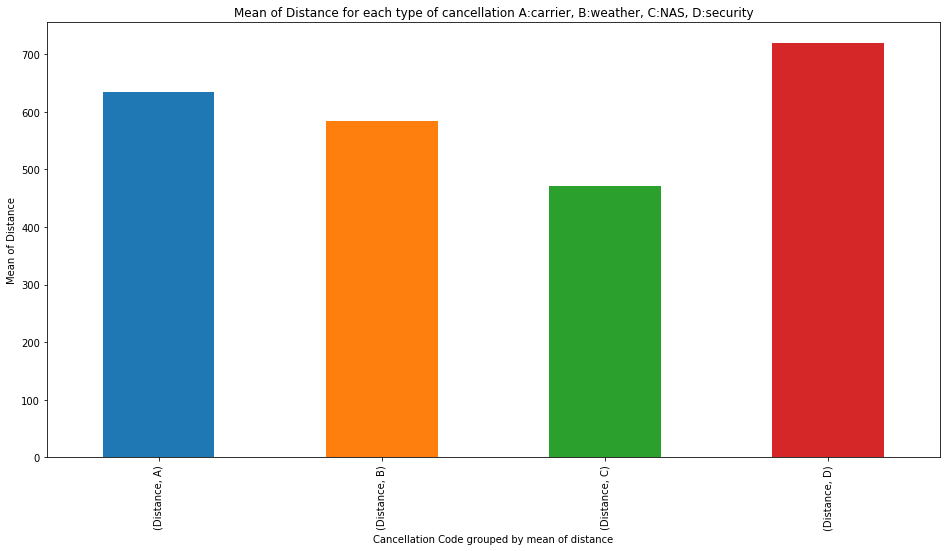

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
df_flight_2008_cancellation[['Distance','CancellationCode']].groupby(['CancellationCode'])[['Distance']].mean().unstack().plot.bar(ax=ax)
plt.title('Mean of Distance for each type of cancellation A:carrier, B:weather, C:NAS, D:security')
plt.xlabel('Cancellation Code grouped by mean of distance')
plt.ylabel('Mean of Distance');

## Cancellation Reason Count for each Month

> The top Months have flight cancelation are 2(FEBRUARY) and 12(DECEMBER), and the cancelled reason is weather, carrier then NAS (National Airspace System)

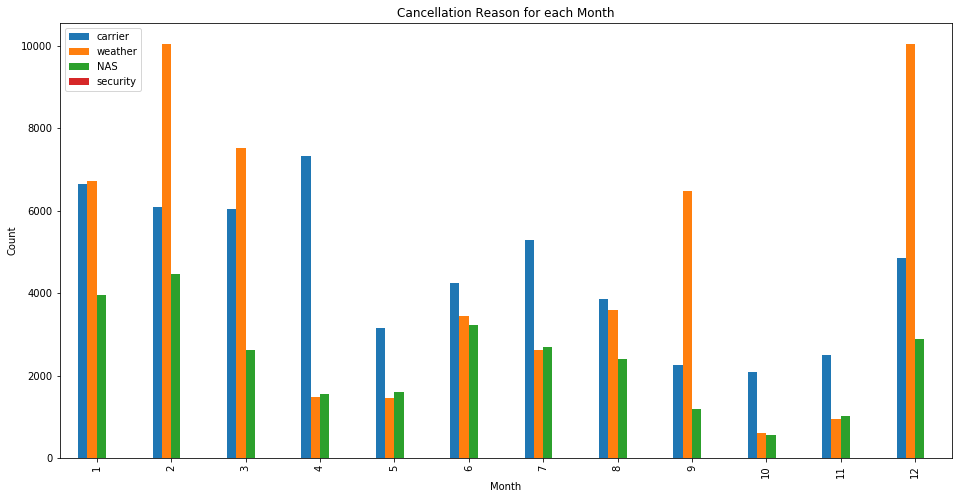

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
df_flight_2008_cancellation[['Month','CancellationCode']].groupby(['Month','CancellationCode'])[['CancellationCode']].count().unstack().plot.bar(ax=ax)
plt.title('Cancellation Reason for each Month') #  A:carrier, B:weather, C:NAS, D:security
plt.ylabel('Count');
plt.legend(CancellationCode.values());

## Days in week cancellation flights per Month

> Form Month and DayOfWeek features, the months 2(February), 6(June), 7(July), and 12(December) of day 5 for February & December, and day 7 for June & July have peak values, so we conclude the most cnacellation happen in friday and sunday of February, June, July, and December, but the most cancellation month is February.

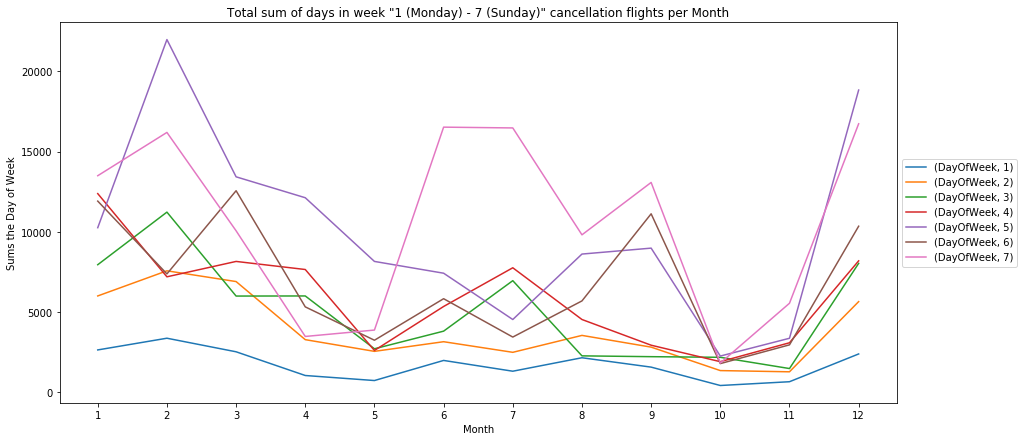

In [13]:
df_month_dayweek_counts = df_flight_2008_cancellation[['Month','DayOfWeek']].groupby(['Month','DayOfWeek'])[['DayOfWeek']].sum()
# plot data
fig, ax = plt.subplots(figsize=(15,7))
df_month_dayweek_counts.unstack().plot(ax=ax)
plt.xticks(range(1,13))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Total sum of days in week "1 (Monday) - 7 (Sunday)" cancellation flights per Month')
plt.ylabel('Sums the Day of Week');

## Unique Carrier Code of Cancellation Flights

> "MQ" and "AA" Unique Carrier code have the most cancellation flights, and the least are "HA", "F9" and "AQ"! 

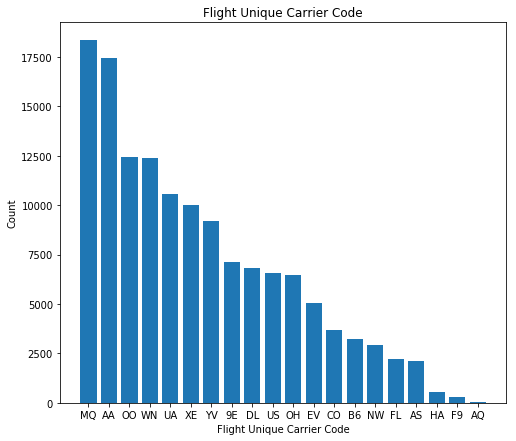

In [16]:
# UniqueCarrier
UniqueCarrier_series = df_flight_2008.UniqueCarrier[df_flight_2008.Cancelled == 1]
dict_UniqueCarrier_series = dict(UniqueCarrier_series.value_counts())

plt.figure(figsize=[8, 7])
plt.bar(dict_UniqueCarrier_series.keys(), dict_UniqueCarrier_series.values())
plt.title('Flight Unique Carrier Code')
plt.ylabel('Count')
plt.xlabel('Flight Unique Carrier Code');

## Mean of Distances' Cancellation Reasons per Unique Carrier

> The most 2 mean of Distance of CancellationCode for each UniqueCarrier:
    - "AA" UniqueCarrier have the highest mean of ditance with security CancellationCode or cancellation reason.
    - "HA" UniqueCarrier have the highest mean of ditance with weather CancellationCode or cancellation reason.

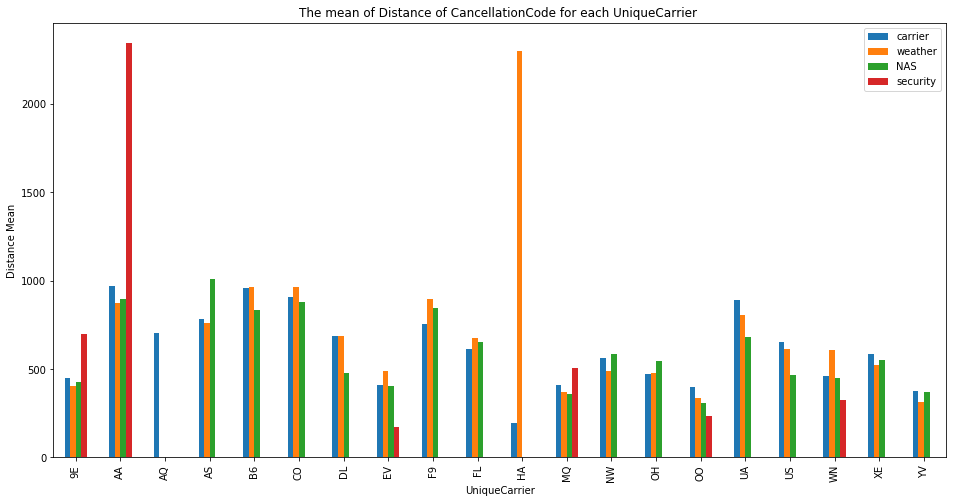

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
df_flight_2008_cancellation[['UniqueCarrier', 'CancellationCode', 'Distance']].groupby(['UniqueCarrier', 'CancellationCode'])[['Distance']].mean().unstack().plot.bar(ax=ax)
plt.title('The mean of Distance of CancellationCode for each UniqueCarrier ') #  A:carrier, B:weather, C:NAS, D:security
plt.ylabel('Distance Mean')
plt.legend(CancellationCode.values());

## Most 30 Origin and Destination Airports have  Cancellation Flights

> In general the most common origin and destination airport of cancellation flights are "ORD", "DFW", "ATL", "LGA", "EWR", "BOS" and "IAH".  

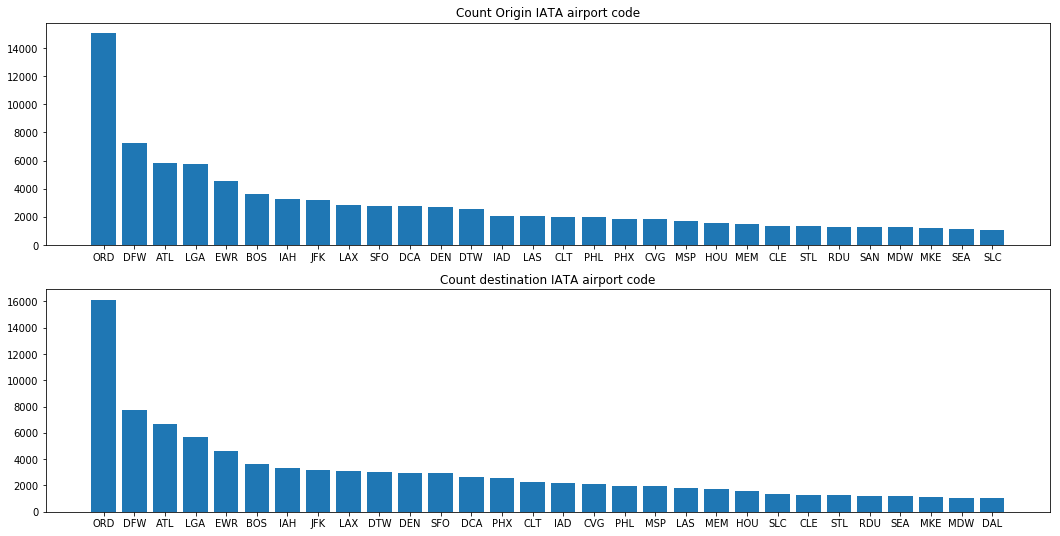

In [19]:
# origin IATA airport code
# Origin is categorical data
Origin_series = df_flight_2008.Origin[df_flight_2008.Cancelled == 1].value_counts()[:30]
dict_Origin_series = dict(Origin_series)

plt.figure(figsize=[18, 9])
plt.subplot(2, 1, 1)
plt.bar(dict_Origin_series.keys(), dict_Origin_series.values())
plt.title('Count Origin IATA airport code'); # please refer to data source for any info of the column http://stat-computing.org/dataexpo/2009/the-data.html

# destination IATA airport code
# Dest is categorical data 
Dest_series = df_flight_2008.Dest[df_flight_2008.Cancelled == 1].value_counts()[:30]
dict_Dest_series = dict(Dest_series)

plt.subplot(2, 1, 2)
plt.bar(dict_Dest_series.keys(), dict_Dest_series.values())
plt.title('Count destination IATA airport code'); # please refer to data source for any info of the column http://stat-computing.org/dataexpo/2009/the-data.html